In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import mutual_info_regression

# Library data visualization
import plotly
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)



import lightgbm as lgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-06-24 07:23:59.219976: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 07:23:59.220207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 07:23:59.386020: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/predicta-1-0-predict-the-unpredictable/submission_key.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable/sample_submission.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable/historical_weather.csv


plot the data to get an idea about the statistics of the dataset


In [2]:
df = pd.read_csv("/kaggle/input/predicta-1-0-predict-the-unpredictable/historical_weather.csv")
df

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...
182333,C112,2018-12-27,22.0,15.9,27.9,0.0,NaN,100.0,13.2
182334,C112,2018-12-28,21.9,14.9,28.2,0.0,NaN,91.0,12.6
182335,C112,2018-12-29,22.4,16.3,28.2,0.0,NaN,61.0,14.2
182336,C112,2018-12-30,21.6,18.5,26.6,1.6,NaN,70.0,17.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182338 entries, 0 to 182337
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city_id             182338 non-null  object 
 1   date                182338 non-null  object 
 2   avg_temp_c          181114 non-null  float64
 3   min_temp_c          176452 non-null  float64
 4   max_temp_c          174845 non-null  float64
 5   precipitation_mm    112594 non-null  float64
 6   snow_depth_mm       12238 non-null   float64
 7   avg_wind_dir_deg    146944 non-null  float64
 8   avg_wind_speed_kmh  159866 non-null  float64
dtypes: float64(7), object(2)
memory usage: 12.5+ MB


In [4]:
df.nunique()

city_id                100
date                  1826
avg_temp_c             692
min_temp_c             720
max_temp_c             705
precipitation_mm       859
snow_depth_mm          407
avg_wind_dir_deg       361
avg_wind_speed_kmh     582
dtype: int64

In [5]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182338 entries, 0 to 182337
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city_id             182338 non-null  object 
 1   date                182338 non-null  object 
 2   avg_temp_c          181114 non-null  float64
 3   min_temp_c          176452 non-null  float64
 4   max_temp_c          174845 non-null  float64
 5   precipitation_mm    112594 non-null  float64
 6   snow_depth_mm       12238 non-null   float64
 7   avg_wind_dir_deg    146944 non-null  float64
 8   avg_wind_speed_kmh  159866 non-null  float64
dtypes: float64(7), object(2)
memory usage: 12.5+ MB


In [6]:
# Step 1: Identify NaN rows in avg_temp_c
nan_rows = df[df['avg_temp_c'].isna()]

deleted_rows_count = 0

for index, row in nan_rows.iterrows():
    min_temp = row['min_temp_c']
    max_temp = row['max_temp_c']
    
    if pd.isna(min_temp) or pd.isna(max_temp):
        deleted_rows_count += 1
    else:
        df.at[index, 'avg_temp_c'] = (min_temp + max_temp) / 2

df.dropna(subset=['avg_temp_c'], inplace=True) 
print(f"Number of rows deleted: {deleted_rows_count}")

Number of rows deleted: 25


In [7]:
# Convert transaction_date to datetime
df['date'] = pd.to_datetime(df['date'])

# Generate the complete date range
complete_date_range = pd.date_range(start='2014-01-01', end='2018-12-31')

# Find missing dates
missing_dates = complete_date_range.difference(df['date'])

# Print missing dates
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
# df['week'] = df['date'].dt.isocalendar().week
df['day'] = df['date'].dt.day
df

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,year,month,day
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2,2014,1,1
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0,2014,1,2
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8,2014,1,3
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3,2014,1,4
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0,2014,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
182333,C112,2018-12-27,22.0,15.9,27.9,0.0,NaN,100.0,13.2,2018,12,27
182334,C112,2018-12-28,21.9,14.9,28.2,0.0,NaN,91.0,12.6,2018,12,28
182335,C112,2018-12-29,22.4,16.3,28.2,0.0,NaN,61.0,14.2,2018,12,29
182336,C112,2018-12-30,21.6,18.5,26.6,1.6,NaN,70.0,17.0,2018,12,30


/tmp/ipykernel_18/4260685536.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


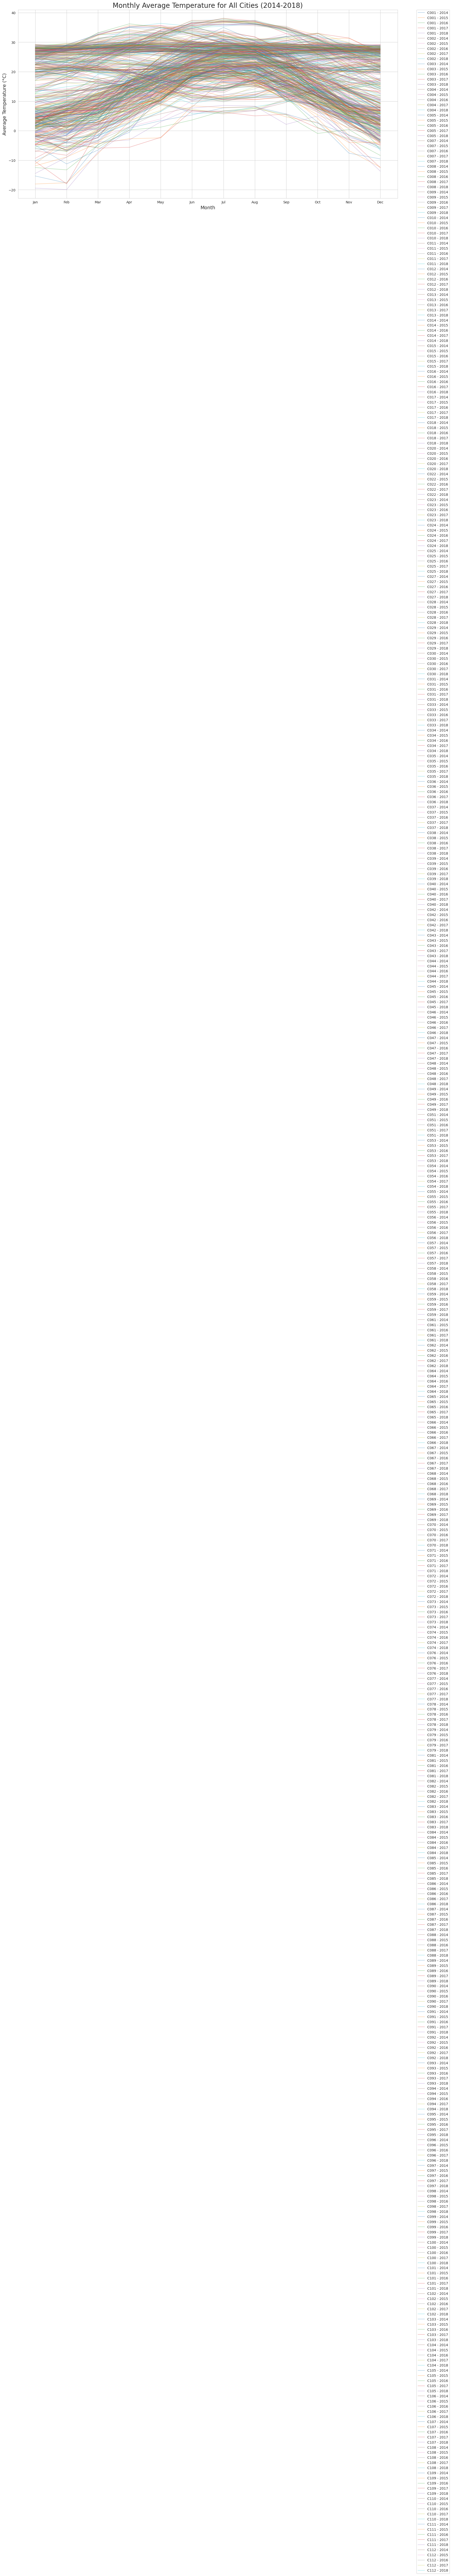

In [9]:
# Calculate monthly average temperature for each city
monthly_avg = df.groupby(['city_id', 'year', 'month'])['avg_temp_c'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")

# Plot average temperature for each city
for city in monthly_avg['city_id'].unique():
    city_data = monthly_avg[monthly_avg['city_id'] == city]
    for year in city_data['year'].unique():
        year_data = city_data[city_data['year'] == year]
        plt.plot(year_data['month'], year_data['avg_temp_c'], 
                 label=f'{city} - {year}', alpha=0.3)

# Customize the plot
plt.title('Monthly Average Temperature for All Cities (2014-2018)', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

# Show the plot
plt.show()

In [10]:

# agg_df = df.loc[(df['month'] == 1)]
# agg_df
condition =((((df['month'] == 12) & (df['day'] >= 22)) |((df['month'] == 1) & (df['day'] <=9))) & df['year'] <2018 )

agg_df = df.loc[condition]


In [11]:
# Create an explicit copy of the DataFrame
agg_df = agg_df.copy()

# Use .loc to set new columns
# agg_df.loc[:, 'city_avg_temp_for_month'] = agg_df.groupby(['city_id', 'year', 'month'], as_index=False)['avg_temp_c'].transform('mean')
# agg_df.loc[:, 'city_avg_max_temp_for_month'] = agg_df.groupby(['city_id', 'year', 'month'], as_index=False)['max_temp_c'].transform('mean')
# agg_df.loc[:, 'city_avg_min_temp_for_month'] = agg_df.groupby(['city_id', 'year', 'month'], as_index=False)['min_temp_c'].transform('mean')
# agg_df
# agg_df['city_avg_temp_for_month'] = agg_df.groupby(['city_id', agg_df['date'].dt.to_period('M')])['avg_temp_c'].transform('mean')
# agg_df['city_avg_max_temp_for_month'] = agg_df.groupby(['city_id', agg_df['date'].dt.to_period('M')])['max_temp_c'].transform('mean')
# agg_df['city_avg_min_temp_for_month'] = agg_df.groupby(['city_id', agg_df['date'].dt.to_period('M')])['min_temp_c'].transform('mean')
# agg_df

agg_df['city_avg_temp'] = agg_df.groupby(['city_id'])['avg_temp_c'].transform('mean')
agg_df['city_avg_max_temp'] = agg_df.groupby(['city_id'])['max_temp_c'].transform('mean')
agg_df['city_avg_min_temp'] = agg_df.groupby(['city_id'])['min_temp_c'].transform('mean')
agg_df

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,year,month,day,city_avg_temp,city_avg_max_temp,city_avg_min_temp
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2,2014,1,1,16.298905,23.433736,10.091173
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0,2014,1,2,16.298905,23.433736,10.091173
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8,2014,1,3,16.298905,23.433736,10.091173
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3,2014,1,4,16.298905,23.433736,10.091173
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0,2014,1,5,16.298905,23.433736,10.091173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182333,C112,2018-12-27,22.0,15.9,27.9,0.0,NaN,100.0,13.2,2018,12,27,19.257222,25.409971,13.245418
182334,C112,2018-12-28,21.9,14.9,28.2,0.0,NaN,91.0,12.6,2018,12,28,19.257222,25.409971,13.245418
182335,C112,2018-12-29,22.4,16.3,28.2,0.0,NaN,61.0,14.2,2018,12,29,19.257222,25.409971,13.245418
182336,C112,2018-12-30,21.6,18.5,26.6,1.6,NaN,70.0,17.0,2018,12,30,19.257222,25.409971,13.245418


In [12]:
train_df = agg_df.drop(columns=['precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh','date','min_temp_c','max_temp_c'], axis=1)
train_df

,city_id,avg_temp_c,year,month,day,city_avg_temp,city_avg_max_temp,city_avg_min_temp
0,C001,6.6,2014,1,1,16.298905,23.433736,10.091173
1,C001,9.3,2014,1,2,16.298905,23.433736,10.091173
2,C001,7.6,2014,1,3,16.298905,23.433736,10.091173
3,C001,7.6,2014,1,4,16.298905,23.433736,10.091173
4,C001,8.6,2014,1,5,16.298905,23.433736,10.091173
...,...,...,...,...,...,...,...,...
182333,C112,22.0,2018,12,27,19.257222,25.409971,13.245418
182334,C112,21.9,2018,12,28,19.257222,25.409971,13.245418
182335,C112,22.4,2018,12,29,19.257222,25.409971,13.245418
182336,C112,21.6,2018,12,30,19.257222,25.409971,13.245418


In [13]:
label = 'avg_temp_c' 
X = train_df.drop(columns=[label], axis=1)  
y = train_df[label] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.001)

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_train, y_train], axis=1), label=label, task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_test, y_test], axis=1), label=label, task=tfdf.keras.Task.REGRESSION)

# Improved Model with Hyperparameter Tuning
model1 = tfdf.keras.GradientBoostedTreesModel(
    task=tfdf.keras.Task.REGRESSION,
    num_trees=200,       # Increased trees for potential improvement
    growing_strategy="BEST_FIRST_GLOBAL",  # Explore alternative growing strategies
    max_depth=25,        # Tune this based on your data complexity
    l1_regularization=0.01,   # Add regularization to prevent overfitting
    l2_regularization=0.01,
    min_examples=2,     # Tune this
    shrinkage=0.1,       # Learning rate
    subsample=0.8,     # Add subsampling for potential improvement
    categorical_algorithm="RANDOM",  # Consider "HISTOGRAM" as well
    random_seed=9 
)

model1.compile(metrics=["mse"])  

model1.fit(x=train_ds, validation_data=test_ds)
evaluation = model1.evaluate(test_ds, return_dict=True)
y_pred1 = model1.predict(test_ds)
y_pred1 = tf.cast(tf.round(y_pred1), tf.int32) 

rmse = np.sqrt(mean_squared_error(y_test, y_pred1))

print("\nModel Performance on Test Set:")
print(f"Root Mean Squared Error (RMSE): {rmse}")













Use /tmp/tmp7hxy9kky as temporary training directory
Reading training dataset...


[WARNING 24-06-24 07:24:30.0467 UTC gradient_boosted_trees.cc:1886] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-06-24 07:24:30.0479 UTC gradient_boosted_trees.cc:1897] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-06-24 07:24:30.0479 UTC gradient_boosted_trees.cc:1911] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:08.789763. Found 182130 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(183, shape=(), dtype=int32)
Validation dataset read in 0:00:00.391963. Found 183 examples.
Training model...
Model trained in 0:00:20.987581
Compiling model...


[INFO 24-06-24 07:25:00.2447 UTC kernel.cc:1233] Loading model from path /tmp/tmp7hxy9kky/model/ with prefix 83c3d75299bd41ed
[INFO 24-06-24 07:25:00.2651 UTC quick_scorer_extended.cc:903] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-06-24 07:25:00.2668 UTC abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-06-24 07:25:00.2668 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 72ms/step

Model Performance on Test Set:
Root Mean Squared Error (RMSE): 2.444789261985402


In [14]:
test_file_path = "/kaggle/input/predicta-1-0-predict-the-unpredictable/submission_key.csv"
test_data = pd.read_csv(test_file_path)
# IDs = test_data.pop('ID')
test_data

,submission_ID,city_id,date
0,1,C001,2019-01-01
1,2,C001,2019-01-02
2,3,C001,2019-01-03
3,4,C001,2019-01-04
4,5,C001,2019-01-05
...,...,...,...
695,696,C112,2019-01-03
696,697,C112,2019-01-04
697,698,C112,2019-01-05
698,699,C112,2019-01-06


In [15]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [16]:
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day
test_data = test_data.drop(columns=['date'], axis=1)
test_data

,submission_ID,city_id,year,month,day
0,1,C001,2019,1,1
1,2,C001,2019,1,2
2,3,C001,2019,1,3
3,4,C001,2019,1,4
4,5,C001,2019,1,5
...,...,...,...,...,...
695,696,C112,2019,1,3
696,697,C112,2019,1,4
697,698,C112,2019,1,5
698,699,C112,2019,1,6


In [17]:
train_df_2018 = train_df[train_df['year'] == 2018]
train_df_2018 = train_df_2018[train_df['month'] == 1]
# train_df_2018.drop_duplicates(subset=['month'])
# train_df_2018 =train_df_2018.drop(columns=['avg_temp_c','day','year'], axis=1) 
# test_data = test_data.merge(train_df_2018, 
#                                  on=['city_id','month'], 
#                                  how='left')
# test_data

train_df_2018 = train_df_2018.groupby(['city_id','year','month'], as_index=False).agg({
    'city_avg_temp': 'first',
    'city_avg_max_temp': 'first' ,
    'city_avg_min_temp': 'first'
})
train_df_2018 =train_df_2018.drop(columns=['year'], axis=1) 
# train_df_2018
test_data = test_data.merge(train_df_2018, 
                                 on=['city_id','month'], 
                                 how='left')
test_data

/tmp/ipykernel_18/3584413399.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df_2018 = train_df_2018[train_df['month'] == 1]


,submission_ID,city_id,year,month,day,city_avg_temp,city_avg_max_temp,city_avg_min_temp
0,1,C001,2019,1,1,16.298905,23.433736,10.091173
1,2,C001,2019,1,2,16.298905,23.433736,10.091173
2,3,C001,2019,1,3,16.298905,23.433736,10.091173
3,4,C001,2019,1,4,16.298905,23.433736,10.091173
4,5,C001,2019,1,5,16.298905,23.433736,10.091173
...,...,...,...,...,...,...,...,...
695,696,C112,2019,1,3,19.257222,25.409971,13.245418
696,697,C112,2019,1,4,19.257222,25.409971,13.245418
697,698,C112,2019,1,5,19.257222,25.409971,13.245418
698,699,C112,2019,1,6,19.257222,25.409971,13.245418


In [18]:
ids = test_data.pop('submission_ID')

In [19]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = model1.predict(test_ds)
pred_rounded = tf.cast(tf.round(preds), tf.int32)
# pred_class_indices = tf.argmax(pred_rounded, axis=1)
# pred_np = pred_class_indices.numpy()
pred_np = pred_rounded.numpy()
output = pd.DataFrame({'submission_ID': ids,
                       'avg_temp_c': pred_np.squeeze()})

output.to_csv("prediction_final11.csv", index=False)


1/1 [==============================] - 0s 75ms/step
